In [1]:
from simulator.utils import *
from detector.utils import *
from detector.detector import *
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# img_size = 2236
img_size = 100
N = 2000 # number of training data


Distribution of Intensity in a Subplot
--------------------------------
1. generate a number of signals with and without atom
2. choose a box around the center
3. plot histogram for intensity
4. create plot for each SNR
5. find threshold line as a function of SNR
6. plot fidelity by applying the model to a set of testing data

In [3]:
# 1

prev_time = time.time()

x0 = img_size // 2 
y0 = img_size // 2 
sim = simulator(img_size, 0.1)

data_tr_for_different_snr = []
labels_tr_for_different_snr = []
SNR = np.linspace(1, 2000, 10)
for snr in SNR:
    data_tr = []
    labels_tr = []
    for i in range(N):
        r = np.random.rand()
        if r > 0.5: 
            labels_tr.append(1)
            data = sim.create_simulation_from_SNR(x0, y0, snr)
            data_tr.append(data)
        else:
            labels_tr.append(0)
            data = sim.create_simulation_from_SNR(x0, y0, snr, no_atom=True)
            data_tr.append(data)
    data_tr_for_different_snr.append(np.array(data_tr))
    labels_tr_for_different_snr.append(np.array(labels_tr))

print(f"time used: {time.time() - prev_time}")


time used: 31.28843092918396


In [4]:
data_tr_for_different_snr = np.array(data_tr_for_different_snr)
labels_tr_for_different_snr = np.array(labels_tr_for_different_snr)

print(data_tr_for_different_snr.shape)
print(labels_tr_for_different_snr.shape)

(10, 2000, 100, 100)
(10, 2000)


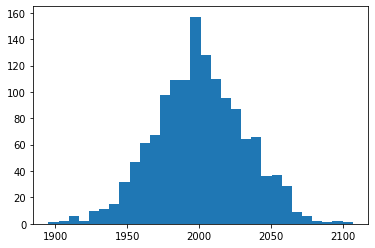

Training accuracy: 0.505
Validation accuracy: 0.5316666666666666
Threshold: 2014.607582938389
SNR: 1.0


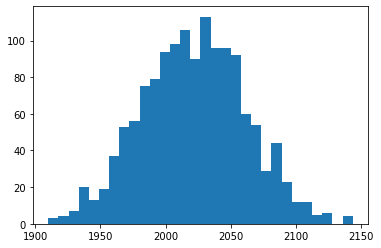

Training accuracy: 0.7578571428571429
Validation accuracy: 0.7883333333333333
Threshold: 2029.1588936576065
SNR: 223.11111111111111


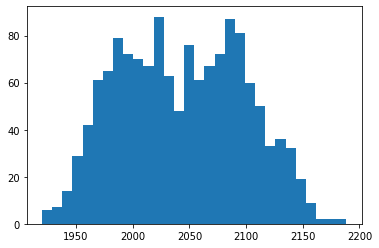

Training accuracy: 0.9278571428571428
Validation accuracy: 0.9283333333333333
Threshold: 2041.2357794361528
SNR: 445.22222222222223


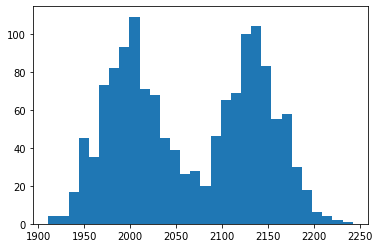

Training accuracy: 0.98
Validation accuracy: 0.9783333333333334
Threshold: 2066.344444444445
SNR: 667.3333333333334


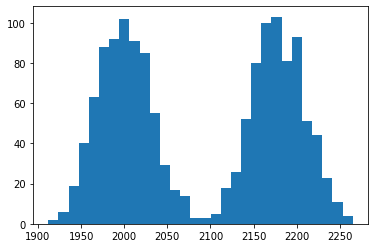

Training accuracy: 0.9971428571428571
Validation accuracy: 0.9983333333333333
Threshold: 2084.4614898989903
SNR: 889.4444444444445


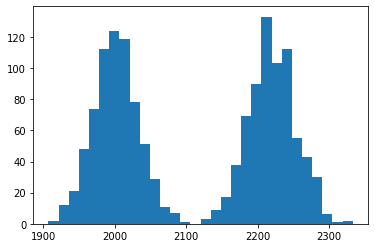

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 2104.071935315598
SNR: 1111.5555555555557


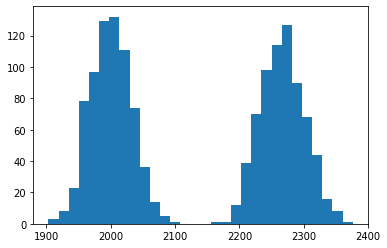

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 2099.1519379844963
SNR: 1333.6666666666667


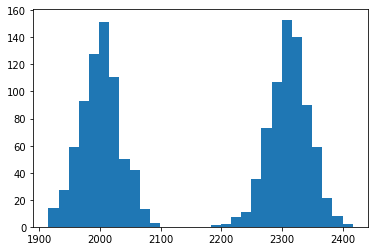

Training accuracy: 0.9992857142857143
Validation accuracy: 1.0
Threshold: 2096.2087380793973
SNR: 1555.7777777777778


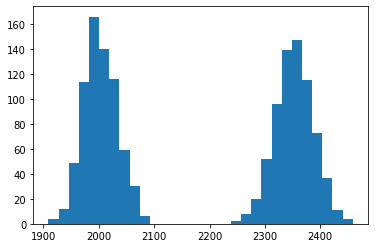

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 2100.2744586116173
SNR: 1777.888888888889


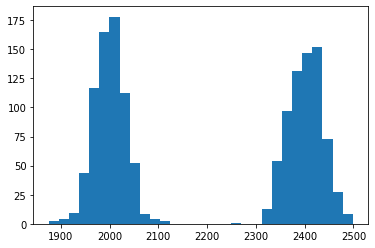

Training accuracy: 0.9985714285714286
Validation accuracy: 1.0
Threshold: 2102.0000000000005
SNR: 2000.0


In [5]:
# 2, 3
thresholds = []
accuracies_tr = []
accuracies_val = []
clfs = []

for i in range(data_tr_for_different_snr.shape[0]):
    data_tr, 
    clf = detector(img_size)
    accuracy_tr, accuracy_val, thresh = clf.train(data_tr_for_different_snr[i], labels_tr_for_different_snr[i], verbose=True)
    print(f"SNR: {SNR[i]}")
    thresholds.append(clf.thresh)
    clfs.append(clf)
    accuracies_tr.append(accuracy_tr)
    accuracies_val.append(accuracy_val)


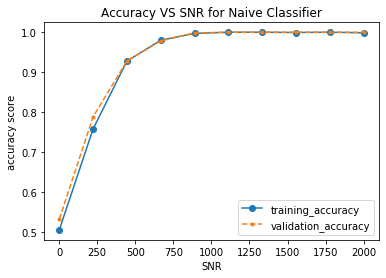

In [19]:
plt.plot(SNR, accuracies_tr, marker='o')
plt.plot(SNR, accuracies_val, marker='.', linestyle='--')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.xlabel("SNR")
plt.ylabel("accuracy score")
plt.title("Accuracy VS SNR for Naive Classifier")
plt.show()

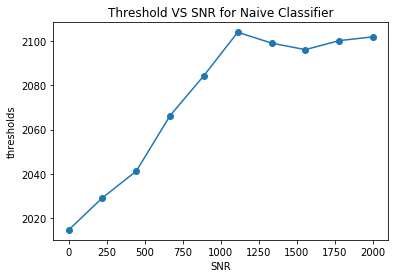

In [13]:
plt.plot(SNR, thresholds, marker='o')
plt.xlabel("SNR")
plt.ylabel("thresholds")
plt.title("Threshold VS SNR for Naive Classifier")
plt.show()

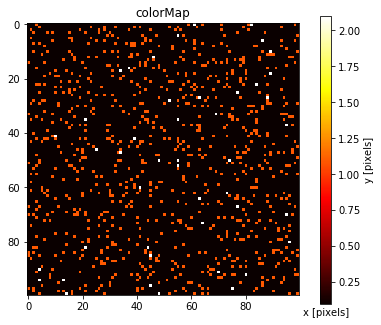

1
[1.1        0.1        0.1        0.1        1.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.10000002 0.10000013 0.10000087
 1.10000479 1.10002145 0.1000787  0.10023642 0.1005815  0.101171
 0.10193065 0.1026061  0.10288019 0.1026061  1.10193065 0.101171
 0.1005815  0.10023642 0.1000787  0.10002145 0.10000479 1.10000087
 0.10000013 0.10000002 0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        1.1        0.1        1.1        0.1        0.1
 1.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        1.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.

In [46]:
idx=9
a = data_tr_for_different_snr[0][idx]
b = labels_tr_for_different_snr[0][idx]
visualize(a)
print(b)
print(a[51])